In [1]:
import pandas as pd
import numpy as np

train_data = pd.read_excel("Data/tr.xlsx",)

In [2]:
over_missing_sample = []
row_value_count = train_data.apply(pd.Series.value_counts,axis=1,dropna=False)

In [3]:
import tools
#Data transform
train_y = pd.DataFrame(train_data['outcome']) 
train_X = pd.DataFrame(train_data.drop(['outcome'],axis=1))

train_X = tools.data_transform(train_X)

In [4]:
import tools
tools.set_pandas_display_options()
#train_X.describe()

In [5]:
threshhold =len(train_X.columns)*0.25
over_missing = row_value_count[np.nan]<=threshhold
class_0 = train_y['outcome']==1

print(sorted(train_y.value_counts()))
train_X = train_X[over_missing|class_0]
train_y = train_y[over_missing|class_0]
print(sorted(train_y.value_counts()))


[879, 51280]
[879, 27076]


In [6]:
# Data split
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(
    train_X ,
    train_y,
    test_size=0.2,
    random_state=42)

print(sorted(train_y.value_counts()))
print(sorted(val_y.value_counts()))

[718, 21646]
[161, 5430]


In [7]:
# Missing value imputation
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import tools
feature_kind = tools.init_feature_kind(train_X)
cont,cate = tools.get_feature_kind(train_X,feature_kind)  

strategy = 'median'

imp_mean = IterativeImputer(max_iter=100,random_state=0)
imp_mean.fit(train_X[cont])

train_X[cont] = imp_mean.transform(train_X[cont])
val_X[cont] = imp_mean.transform(val_X[cont])

print("filled continuous missing value with "+strategy)

strategy = 'constant'

imp = SimpleImputer(missing_values=np.nan, strategy=strategy,fill_value=10.0)
imp.fit(train_X[cate])

train_X[cate] = imp.transform(train_X[cate])
val_X[cate] = imp.transform(val_X[cate])


print("filled nominal missing value with ",strategy)


filled continuous missing value with median
filled nominal missing value with  constant


In [8]:
from sklearn import preprocessing


cont,cate = tools.get_feature_kind(train_X,feature_kind)

scaler = preprocessing.StandardScaler().fit(train_X[cont])
train_X[cont] = scaler.transform(train_X[cont])
val_X[cont] = scaler.transform(val_X[cont])

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
minmax_train = pd.DataFrame(scaler.fit_transform(train_X),columns=train_X.columns)
minmax_val = pd.DataFrame(scaler.fit_transform(val_X),columns=train_X.columns)

In [10]:
minmax_train.describe()


,AGE,SEX,LOS,Joint,Drain,Cemented,Commercial_ALBC,Non_commercial_ALBC,cci_index,elx_index,Blood_trans,ASA,CBC_WBC,CBC_RBC,CBC_HG,CBC_HT,CBC_MCV,CBC_MCH,CBC_MCHC,CBC_RDW,CBC_Platelet,CBC_RDWCV,BUN,Crea,GOT,GPT,ALB,Na,K,UA,Diagnosis,Congestive Heart Failure,Cardiac Arrhythmia,Valvular Disease,Heart disease,Pulmonary Circulation Disorders,Peripheral Vascular Disorders,Hypertension Uncomplicated,Paralysis,Other Neurological Disorders,Chronic Pulmonary Disease,Lung disease,Diabetes,Hypothyroidism,Renal Failure,Liver Disease,Peptic Ulcer Disease excluding bleeding,AIDS/HIV,Lymphoma,Metastatic Cancer,Solid Tumor without Metastasis,Cancer history,Rheumatoid Arthritis/collagen,Coagulopathy,Obesity,Weight Loss,Fluid and Electrolyte Disorders,Blood Loss Anemia,Deficiency Anemia,Anemia,Alcohol Abuse,Drug Abuse,Psychoses,Depression,Psyciatric disorder,OP_time
count,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.00000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000,22364.000000
mean,0.606304,0.035123,0.067074,0.360937,0.689143,0.638839,0.092023,0.550617,0.039459,0.059199,0.122429,0.421541,0.035979,0.545102,0.665808,0.670762,0.559291,0.608514,0.609937,0.248170,0.360266,0.058710,0.140585,0.346144,0.019846,0.149236,0.959610,0.503449,0.761993,0.166735,0.081327,0.022223,0.031971,0.020077,0.024757,0.001699,0.005589,0.216240,0.002459,0.012610,0.047711,0.024705,0.096405,0.009211,0.022805,0.055938,0.04543,0.000313,0.001565,0.003488,0.037784,0.014279,0.033670,0.004561,0.008809,0.001565,0.012788,0.002236,0.006797,0.004516,0.007691,0.001073,0.002683,0.016813,0.009748,0.546819
std,0.144393,0.055531,0.043374,0.480283,0.462855,0.480348,0.289065,0.497442,0.083324,0.101646,0.327788,0.395705,0.011664,0.077362,0.088546,0.087403,0.069969,0.068705,0.055966,0.111240,0.050317,0.021370,0.052517,0.037145,0.006712,0.033600,0.010555,0.043670,0.051829,0.031921,0.190646,0.147412,0.175927,0.140267,0.104968,0.041187,0.074554,0.411689,0.049532,0.111585,0.213158,0.111315,0.295152,0.095534,0.149283,0.229807,0.20825,0.017690,0.039530,0.058955,0.190678,0.073353,0.180383,0.067382,0.093443,0.039530,0.112363,0.047232,0.082163,0.047541,0.087362,0.032742,0.051728,0.128572,0.072602,0.050935
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.534884,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.030011,0.502763,0.617021,0.625217,0.553947,0.606837,0.596026,0.176235,0.331745,0.045505,0.109893,0.317936,0.019291,0.131709,0.952565,0.484232,0.717462,0.148560,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [11]:
from PIL import Image, ImageDraw 
from torchvision import transforms
def raw_to_image(X):
    bar_width = 1
    gap_width = 2
    num_of_feature = len(train_X.columns)
    w = bar_width*num_of_feature + gap_width*(num_of_feature+1)
    h = w

    img_X = []
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
    
    for ind,sample in minmax_train.iterrows():
        h_pt = gap_width
        img = Image.new('1', (w, h)) 
        for feature in np.array(sample):
            draw = ImageDraw.Draw(img)
            draw.rectangle([h_pt,0,h_pt+bar_width,h*feature],fill=1)
            h_pt+=bar_width+gap_width
        #img.show()
        img_X.append(transform(img))
    
    return img_X


In [12]:
#img_train_X = raw_to_image(train_X)
#img_val_X = raw_to_image(val_X)


In [13]:
def y_onehot(y):
    mapped = []
    
    for ind,lab in y.iterrows():
        if(lab[0]==0):
            mapped.append([1,0])
        elif(lab[0]==1):
            mapped.append([0,1])
        else:
            print(lab)
            print('error')
    return mapped
map_train_y = y_onehot(train_y)
map_val_y = y_onehot(val_y)

In [41]:
from torch.utils.data import DataLoader, Dataset
class TrainDataset(Dataset):
    def __init__(self,X,y) -> None:
        super().__init__()
        self.X = X
        self.y = y
    def __len__(self):
        return len(self.y)
    def __getitem__(self, index) :
        return torch.tensor(self.X.iloc[index]).to(device),torch.tensor(self.y[index]).to(device)

In [42]:
from torch.utils.data import dataloader
import torch

device = torch.device('cuda')

train_dataset = TrainDataset(train_X,map_train_y)
val_dataset = TrainDataset(val_X,map_val_y)





In [54]:
from torch.utils.data.sampler import WeightedRandomSampler
def balance_prob(y):
    print(y.value_counts())
    prob = 1/y.value_counts()
    print(prob)
    dataset_element_weights = [] # each element prob
    for label_id in y:                
        dataset_element_weights.append(prob[label_id])
    return dataset_element_weights

balance_prob = balance_prob(train_y['outcome'])
sampler = WeightedRandomSampler(weights=balance_prob,num_samples=len(map_train_y),replacement=True)

0    21646
1      718
Name: outcome, dtype: int64
0    0.000046
1    0.001393
Name: outcome, dtype: float64


In [74]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# Create CNN Model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.line1 = nn.Linear(66,16)
        self.line2 = nn.Linear(16,4)
        self.line3 = nn.Linear(4,2)
        self.sig = nn.Sigmoid()
    
    def forward(self, x):
        out = self.line1(x)
        out = self.sig(out)
        out = self.line2(out)
        out = self.sig(out)
        out = self.line3(out)
        out = F.softmax(out,1)
        return out

In [75]:
from torch.utils.data import WeightedRandomSampler
import torchvision.models as models
import torch.nn as nn
# Hyper parm
# batch_size, epoch and iteration
batch_size = 80
n_iters = 11000
num_epochs = n_iters / (len(train_X) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, sampler=sampler)

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size = batch_size, shuffle = False)


model = Net()
model.to(device)
# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.1
optimizer = torch.optim.Adam(model.parameters())
lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.9)

In [76]:
from torch.autograd import Variable
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

model.train()
performace = {}


for epoch in range(num_epochs):
    for i, (X, y) in enumerate(train_loader):
        

        optimizer.zero_grad() # Clear gradients
        outputs = model(Variable(X.float().to(device))) # Forward propagation
        #print(outputs)
       # print(y.float())
        #print(outputs)
        loss = error(outputs,y.float()) # Calculate softmax and cross entropy loss
        loss.backward() # Calculating gradients
        optimizer.step() # Update parameters
       
        count += 1
        
        if count%100 == 0:
            # Calculate Accuracy         
            predict = []
            true = []
            model.eval()
            # Predict val dataset
            for X, y in val_loader:
                #print(X.float())
                outputs = model(X.float()) # Forward propagation
                val_loss = error(outputs,y.float())
                outputs = outputs.cpu().detach().numpy()
                y = y.cpu().detach().numpy()
                
                for pred in outputs:
                    predict.append(np.argmax(pred))
                for label in y:
                    true.append(np.argmax(label))
                
            #print(true)
           # print(predict)
            performace[count] = (tools.get_performance(true,predict))
            
            
            print("iter:",count,"train loss:",loss.data.item(),"val_loss:",val_loss.data.item())
            print("val")
            print("f1_score:",performace[count]['f1_score'],'confusion matrix:\n',performace[count]['confusion matrix'])
            print()
            performace[count]['train_loss'] = loss.data.item()
            performace[count]['val_loss'] = val_loss.data.item()
                
                
            model.train()
    
        


iter: 100 train loss: 0.686720609664917 val_loss: 0.6970499753952026
val
f1_score: 0.08248062015503875 confusion matrix:
 [[2499 2931]
 [  28  133]]

iter: 200 train loss: 0.6807495355606079 val_loss: 0.6992378830909729
val
f1_score: 0.08274078862314156 confusion matrix:
 [[2625 2805]
 [  33  128]]

iter: 300 train loss: 0.668623149394989 val_loss: 0.66982501745224
val
f1_score: 0.086716594402838 confusion matrix:
 [[3164 2266]
 [  51  110]]

iter: 400 train loss: 0.642996072769165 val_loss: 0.6747235655784607
val
f1_score: 0.08505747126436783 confusion matrix:
 [[3092 2338]
 [  50  111]]

iter: 500 train loss: 0.647574245929718 val_loss: 0.6667486429214478
val
f1_score: 0.09208400646203554 confusion matrix:
 [[3229 2201]
 [  47  114]]

iter: 600 train loss: 0.6310554146766663 val_loss: 0.633682131767273
val
f1_score: 0.09878934624697336 confusion matrix:
 [[3628 1802]
 [  59  102]]

iter: 700 train loss: 0.630173921585083 val_loss: 0.6120939254760742
val
f1_score: 0.1103591879229568 c

<AxesSubplot:>

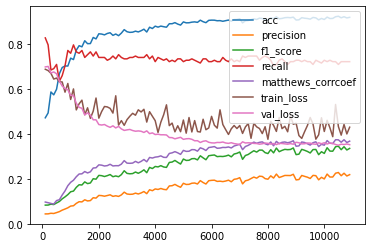

In [77]:
#print(pd.DataFrame(performace).T)    
pd.DataFrame(performace).T.plot()

In [78]:
torch.save(model.state_dict(), 'weight')

In [82]:
final_performance = {}
predict = []
true = []
model.eval()
for X, y in val_loader:
    #print(X.float())
    outputs = model(X.float()) # Forward propagation
    val_loss = error(outputs,y.float())
    outputs = outputs.cpu().detach().numpy()
    y = y.cpu().detach().numpy()
    
    for pred in outputs:
        predict.append(np.argmax(pred))
    for label in y:
        true.append(np.argmax(label))
final_performance['val'] = tools.get_performance(true,predict)
predict = []
true = []
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size)

for X, y in train_loader:
    #print(X.float())
    outputs = model(X.float()) # Forward propagation
    val_loss = error(outputs,y.float())
    outputs = outputs.cpu().detach().numpy()
    y = y.cpu().detach().numpy()
    
    for pred in outputs:
        predict.append(np.argmax(pred))
    for label in y:
        true.append(np.argmax(label))
final_performance['train'] = tools.get_performance(true,predict)

In [83]:
pd.DataFrame(final_performance)

,val,train
confusion matrix,"[[5000, 430], [44, 117]]","[[20249, 1397], [102, 616]]"
acc,0.915221,0.932973
precision,0.213894,0.306011
f1_score,0.330508,0.451117
recall,0.726708,0.857939
matthews_corrcoef,0.364488,0.488685
